<a href="https://colab.research.google.com/github/VinayakG2002/README.md/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import torch
import matplotlib.pyplot as plt
import nltk
import random

In [2]:
url='https://raw.githubusercontent.com/VinayakG2002/NLPlay-with-Transformers/main/IMDB%20Dataset.csv?token=ATKA2LIXPHWLGQT64HBC2KLA6XEPW'
df = pd.read_csv(url)

In [3]:
print(df.columns)
df.describe()

Index(['review', 'sentiment'], dtype='object')


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [4]:
def splitDF(r):
  dataLen = len(df)
  temp = ['test']*int((1-r)*dataLen) + ['train']*int((r)*dataLen)
  random.shuffle(temp)
  df['split'] = temp

#splitDF(0.3)

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
df['review'] = df['review'].apply(lambda x:x.lower())

In [7]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
df['without stopwords']=df['review'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))


In [8]:
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

In [9]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', ','))
    return final

df['review'] = df['review'].apply(remove_punctuation)

In [10]:
def remove_tag(text):
  final=""
  x=True
  for letter in text:
    if letter=='<':
      x=False
    if x==True:
      final=final + letter
    if letter=='>':
      x=True
      final= final+ " "
  return final
df['review'] = df['review'].apply(remove_tag)

In [11]:
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked they are right as this is exactly what happened with me  the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word  it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far away  i would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare forget prett

In [12]:
nltk.download('punkt')
df['review']=df['review'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
def stemmer(input):
  output= [nltk.stem.PorterStemmer().stem(word) for word in input]
  return output
df['review']=df['review'].apply(stemmer)

In [14]:
df['sentiment']=[1*(sentiment=='positive') for sentiment in df['sentiment']]

In [15]:
df['len_review'] = df['review'].apply(lambda x:len(x))

In [16]:
df.head(10)

,review,sentiment,without stopwords,len_review
0,"[one, of, the, other, review, ha, mention, tha...",1,one reviewers mentioned watching 1 oz episode ...,312
1,"[a, wonder, littl, product, the, film, techniq...",1,wonderful little production. <br /><br />the f...,162
2,"[i, thought, thi, wa, a, wonder, way, to, spen...",1,thought wonderful way spend time hot summer we...,171
3,"[basic, there, 's, a, famili, where, a, littl,...",0,basically there's family little boy (jake) thi...,140
4,"[petter, mattei, 's, love, in, the, time, of, ...",1,"petter mattei's ""love time money"" visually stu...",228
5,"[probabl, my, all-tim, favorit, movi, a, stori...",1,"probably all-time favorite movie, story selfle...",124
6,"[i, sure, would, like, to, see, a, resurrect, ...",1,sure would like see resurrection dated seahunt...,153
7,"[thi, show, wa, an, amaz, fresh, &, innov, ide...",0,"show amazing, fresh & innovative idea 70's fir...",179
8,"[encourag, by, the, posit, comment, about, thi...",0,encouraged positive comments film looking forw...,134
9,"[if, you, like, origin, gut, wrench, laughter,...",1,like original gut wrenching laughter like movi...,32


In [17]:

from gensim import corpora

review_dict = corpora.Dictionary(df['review'])
VOCAB_SIZE = len(review_dict)

In [18]:
review_dict?

In [19]:
print(len(review_dict))
review_dict

133275


In [20]:
review_int = []
for review in df['review']:
  temp = [review_dict.token2id[x] for x in review]
  review_int.append(temp)
df['review_int'] = review_int

In [21]:
df.head(10)

,review,sentiment,without stopwords,len_review,review_int
0,"[one, of, the, other, review, ha, mention, tha...",1,one reviewers mentioned watching 1 oz episode ...,312,"[117, 115, 158, 121, 134, 70, 102, 157, 7, 174..."
1,"[a, wonder, littl, product, the, film, techniq...",1,wonderful little production. <br /><br />the f...,162,"[4, 256, 217, 231, 158, 207, 244, 86, 253, 252..."
2,"[i, thought, thi, wa, a, wonder, way, to, spen...",1,thought wonderful way spend time hot summer we...,171,"[78, 320, 161, 173, 4, 256, 324, 164, 312, 321..."
3,"[basic, there, 's, a, famili, where, a, littl,...",0,basically there's family little boy (jake) thi...,140,"[340, 373, 187, 4, 350, 177, 4, 217, 342, 1, 3..."
4,"[petter, mattei, 's, love, in, the, time, of, ...",1,"petter mattei's ""love time money"" visually stu...",228,"[430, 420, 187, 294, 80, 158, 321, 115, 422, 8..."
5,"[probabl, my, all-tim, favorit, movi, a, stori...",1,"probably all-time favorite movie, story selfle...",124,"[497, 492, 467, 482, 358, 4, 505, 115, 502, 50..."
6,"[i, sure, would, like, to, see, a, resurrect, ...",1,sure would like see resurrection dated seahunt...,153,"[78, 545, 182, 355, 164, 238, 4, 538, 115, 4, ..."
7,"[thi, show, wa, an, amaz, fresh, &, innov, ide...",0,"show amazing, fresh & innovative idea 70's fir...",179,"[161, 146, 173, 11, 565, 585, 335, 594, 593, 8..."
8,"[encourag, by, the, posit, comment, about, thi...",0,encouraged positive comments film looking forw...,134,"[619, 189, 158, 632, 615, 5, 161, 207, 116, 62..."
9,"[if, you, like, origin, gut, wrench, laughter,...",1,like original gut wrenching laughter like movi...,32,"[79, 183, 355, 600, 641, 646, 643, 183, 645, 3..."


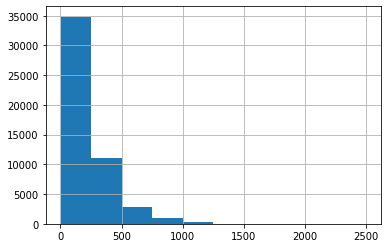

count    50000.000000
mean       236.898580
std        176.096492
min          4.000000
25%        129.000000
50%        177.000000
75%        287.000000
max       2492.000000
Name: len_review, dtype: float64

In [22]:
%matplotlib inline
pd.Series(df['len_review']).hist()
plt.show()
pd.Series(df['len_review']).describe()

In [23]:
review_int = df['review_int']
review_len = df['len_review']
review_label = df['sentiment']
review_int = [review_int[i] for i,x in enumerate(review_int) if review_len[i]>0]
review_label = [review_label[i] for i,x in enumerate(review_label) if review_len[i]>0]
review_len = [review_len[i] for i,x in enumerate(review_len) if review_len[i]>0 ]

In [24]:
len(review_int)

50000

In [25]:
def pad_features(review_int, L):
  features = np.zeros((len(review_int),L), dtype = int)
  for i,review in enumerate(review_int):
    l = len(review)
    if l <= L:
      patch = [0]*(L-l)
      new = patch + review
      features[i,:] = np.array(new)
    else :
      features[i,:] = np.array(review[:L])
  return features

In [26]:
features = pad_features(review_int, 200)


In [27]:
print(features[:10,:])


[[117 115 158 ... 103  15 158]
 [  0   0   0 ... 245 175 198]
 [  0   0   0 ... 238 180 279]
 ...
 [  0   0   0 ... 116 158 263]
 [  0   0   0 ... 626 631 222]
 [  0   0   0 ...  87 210 640]]


In [28]:
split_frac = 0.8

train_x = features[0:int(len(features)*split_frac)]
train_y = np.array(review_label[0:int(len(features)*split_frac)])

test_x = features[len(features)-int(len(features)*split_frac):len(features)-int(len(features)*split_frac/2)]
test_y = np.array(review_label[len(features)-int(len(features)*split_frac):len(features)-int(len(features)*split_frac/2)])

valid_x = features[len(features)-int(len(features)*split_frac/2):]
valid_y = np.array(review_label[len(features)-int(len(features)*split_frac/2):]) 

In [29]:
from torch.utils.data import DataLoader, TensorDataset

train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))

batch_size = 50

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)

In [30]:

# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[    0,     0,     0,  ...,   115, 18855,  6685],
        [    0,     0,     0,  ...,   260,   267,   828],
        [    0,     0,     0,  ...,    19, 13838,   616],
        ...,
        [    0,     0,     0,  ...,  1545,   406,  5364],
        [ 1157,   158,   231,  ...,   158,   429,  1442],
        [    0,     0,     0,  ...,   333,   149,    54]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        0, 1])


In [31]:

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)


Device available for running: 
cuda


In [32]:
class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and RNN layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        
    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)
  
        # embeddings and rnn_out
        embeds = self.embedding(x)
        rnn_out, hidden = self.rnn(embeds, hidden)
    
        # stack up rnn outputs
        rnn_out = rnn_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(rnn_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
        
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        return hidden
    

In [33]:
# Instantiate the model w/ hyperparams
vocab_size = len(review_dict)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentRNN(
  (embedding): Embedding(133276, 400)
  (rnn): RNN(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [34]:
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


In [35]:
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [36]:
# training params

epochs = 10

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1
        #print(counter)
       
        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = h.data
        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = h.data

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/10... Step: 100... Loss: 0.687554... Val Loss: 0.742734
Epoch: 1/10... Step: 200... Loss: 0.725510... Val Loss: 0.679339
Epoch: 1/10... Step: 300... Loss: 0.658136... Val Loss: 0.692222
Epoch: 1/10... Step: 400... Loss: 0.627124... Val Loss: 0.660782
Epoch: 1/10... Step: 500... Loss: 0.684566... Val Loss: 0.684857
Epoch: 1/10... Step: 600... Loss: 0.592014... Val Loss: 0.634123
Epoch: 1/10... Step: 700... Loss: 0.711821... Val Loss: 0.701428
Epoch: 1/10... Step: 800... Loss: 0.679092... Val Loss: 0.693340
Epoch: 2/10... Step: 900... Loss: 0.670546... Val Loss: 0.677470
Epoch: 2/10... Step: 1000... Loss: 0.698638... Val Loss: 0.683849
Epoch: 2/10... Step: 1100... Loss: 0.786845... Val Loss: 0.732349
Epoch: 2/10... Step: 1200... Loss: 0.626498... Val Loss: 0.645274
Epoch: 2/10... Step: 1300... Loss: 0.558556... Val Loss: 0.623912
Epoch: 2/10... Step: 1400... Loss: 0.636108... Val Loss: 0.631598
Epoch: 2/10... Step: 1500... Loss: 0.650933... Val Loss: 0.611277
Epoch: 2/10... Step

In [37]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = h.data

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}%".format(test_acc*100))

Test loss: 0.400
Test accuracy: 83.030%


In [38]:
def preprocess(review):
    review = review.lower()
    word_list = review.split()
    num_list = []
    #list of reviews
    #though it contains only one review as of now
    reviews_int = []
    for word in word_list:
        if word in review_dict.token2id:
            num_list.append(review_dict.token2id[word])
    reviews_int.append(num_list)
    return reviews_int

In [39]:
def predict(net, test_review, sequence_length=200):
    ''' Prints out whether a give review is predicted to be 
        positive or negative in sentiment, using a trained model.
        
        params:
        net - A trained net 
        test_review - a review made of normal text and punctuation
        sequence_length - the padded length of a review
        '''
    #change the reviews to sequence of integers
    int_rev = preprocess(test_review)
    #pad the reviews as per the sequence length of the feature
    features = pad_features(int_rev, L=seq_length)
    
    #changing the features to PyTorch tensor
    features = torch.from_numpy(features)
    
    #pass the features to the model to get prediction
    net.eval()
    val_h = net.init_hidden(1)
    val_h = val_h.data

    if(train_on_gpu):
        features = features.cuda()

    output, val_h = net(features, val_h)
    
    #rounding the output to nearest 0 or 1
    pred = torch.round(output)
    
    #mapping the numeric values to postive or negative
    sent = ["Positive" if pred.item() == 1 else "Negative"]
    
    # print custom response based on whether test_review is pos/neg
    print(sent,'  ',((pred.item()==1)*output.item()+(pred.item()==0)*(1-output.item()))*100,'%')

In [40]:
positive_review = 'A great movie. Totally worth every penny. '

In [41]:
seq_length=200
predict(net, positive_review, seq_length)

['Positive']    90.97612500190735 %


In [42]:
negative_review = 'Amongst the worst works of diresctor nick furry. I want my money back. Waste of time.'

In [43]:

seq_length=200
predict(net, negative_review, seq_length)

['Negative']    87.9004254937172 %


In [44]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in valid_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = h.data

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)

# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(valid_loader.dataset)
print("Test accuracy: {:.3f}%".format(test_acc*100))

Test loss: 0.481
Test accuracy: 78.225%
